# Explaining models using SHAP

Adapted by Miquel Perello-Nieto, based on a R notebook by Telmo Silva Filho


# Introduction

In this practical, we will learn how to explain models using the SHAP package. For starters, we will use the Statlog (heart)) dataset. Information about the Statlog (Heart) dataset can be found at https://archive.ics.uci.edu/dataset/145/statlog+heart

In [1]:
import pandas
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_heart = fetch_ucirepo(id=145)

In [2]:
statlog_heart.metadata

{'uci_id': 145,
 'name': 'Statlog (Heart)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/145/statlog+heart',
 'data_url': 'https://archive.ics.uci.edu/static/public/145/data.csv',
 'abstract': 'This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 270,
 'num_features': 13,
 'feature_types': ['Categorical', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['heart-disease'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': None,
 'last_updated': 'Fri Feb 09 2024',
 'dataset_doi': '10.24432/C57303',
 'creators': [],
 'intro_paper': None,
 'additional_info': {'summary': 'Cost Matrix\r\n\r\n_______\t abse  pres\r\nabsence\t 0\t1\r\npresence  5\t0\r\n\r\nwhere the rows represent the true values 

In [3]:
class_names = ['Absence', 'Presence']
statlog_heart.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Continuous,Age,None,None,no
1,sex,Feature,Binary,Sex,None,None,no
2,chest-pain,Feature,Categorical,None,chest pain type,None,no
3,rest-bp,Feature,Continuous,None,resting blood pressure,None,no
4,serum-chol,Feature,Continuous,None,serum cholesterol,mg/dl,no
5,fasting-blood-sugar,Feature,Binary,None,fasting blood sugar > 120 mg/dl,None,no
6,electrocardiographic,Feature,Categorical,None,resting electrocardiographic results,None,no
7,max-heart-rate,Feature,Continuous,None,maximum heart rate achieved,None,no
8,angina,Feature,Binary,None,exercise induced anigna,None,no
9,oldpeak,Feature,Continuous,None,oldpeak = ST depression induced by exercise re...,None,no


In [4]:
  # data (as pandas dataframes) 
X = statlog_heart.data.features 
y = statlog_heart.data.targets 

In [5]:
X.head()

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


In [6]:
X.describe()

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
X.corr().style.background_gradient(cmap='coolwarm')

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
chest-pain,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
rest-bp,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
serum-chol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
fasting-blood-sugar,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
electrocardiographic,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
max-heart-rate,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
oldpeak,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


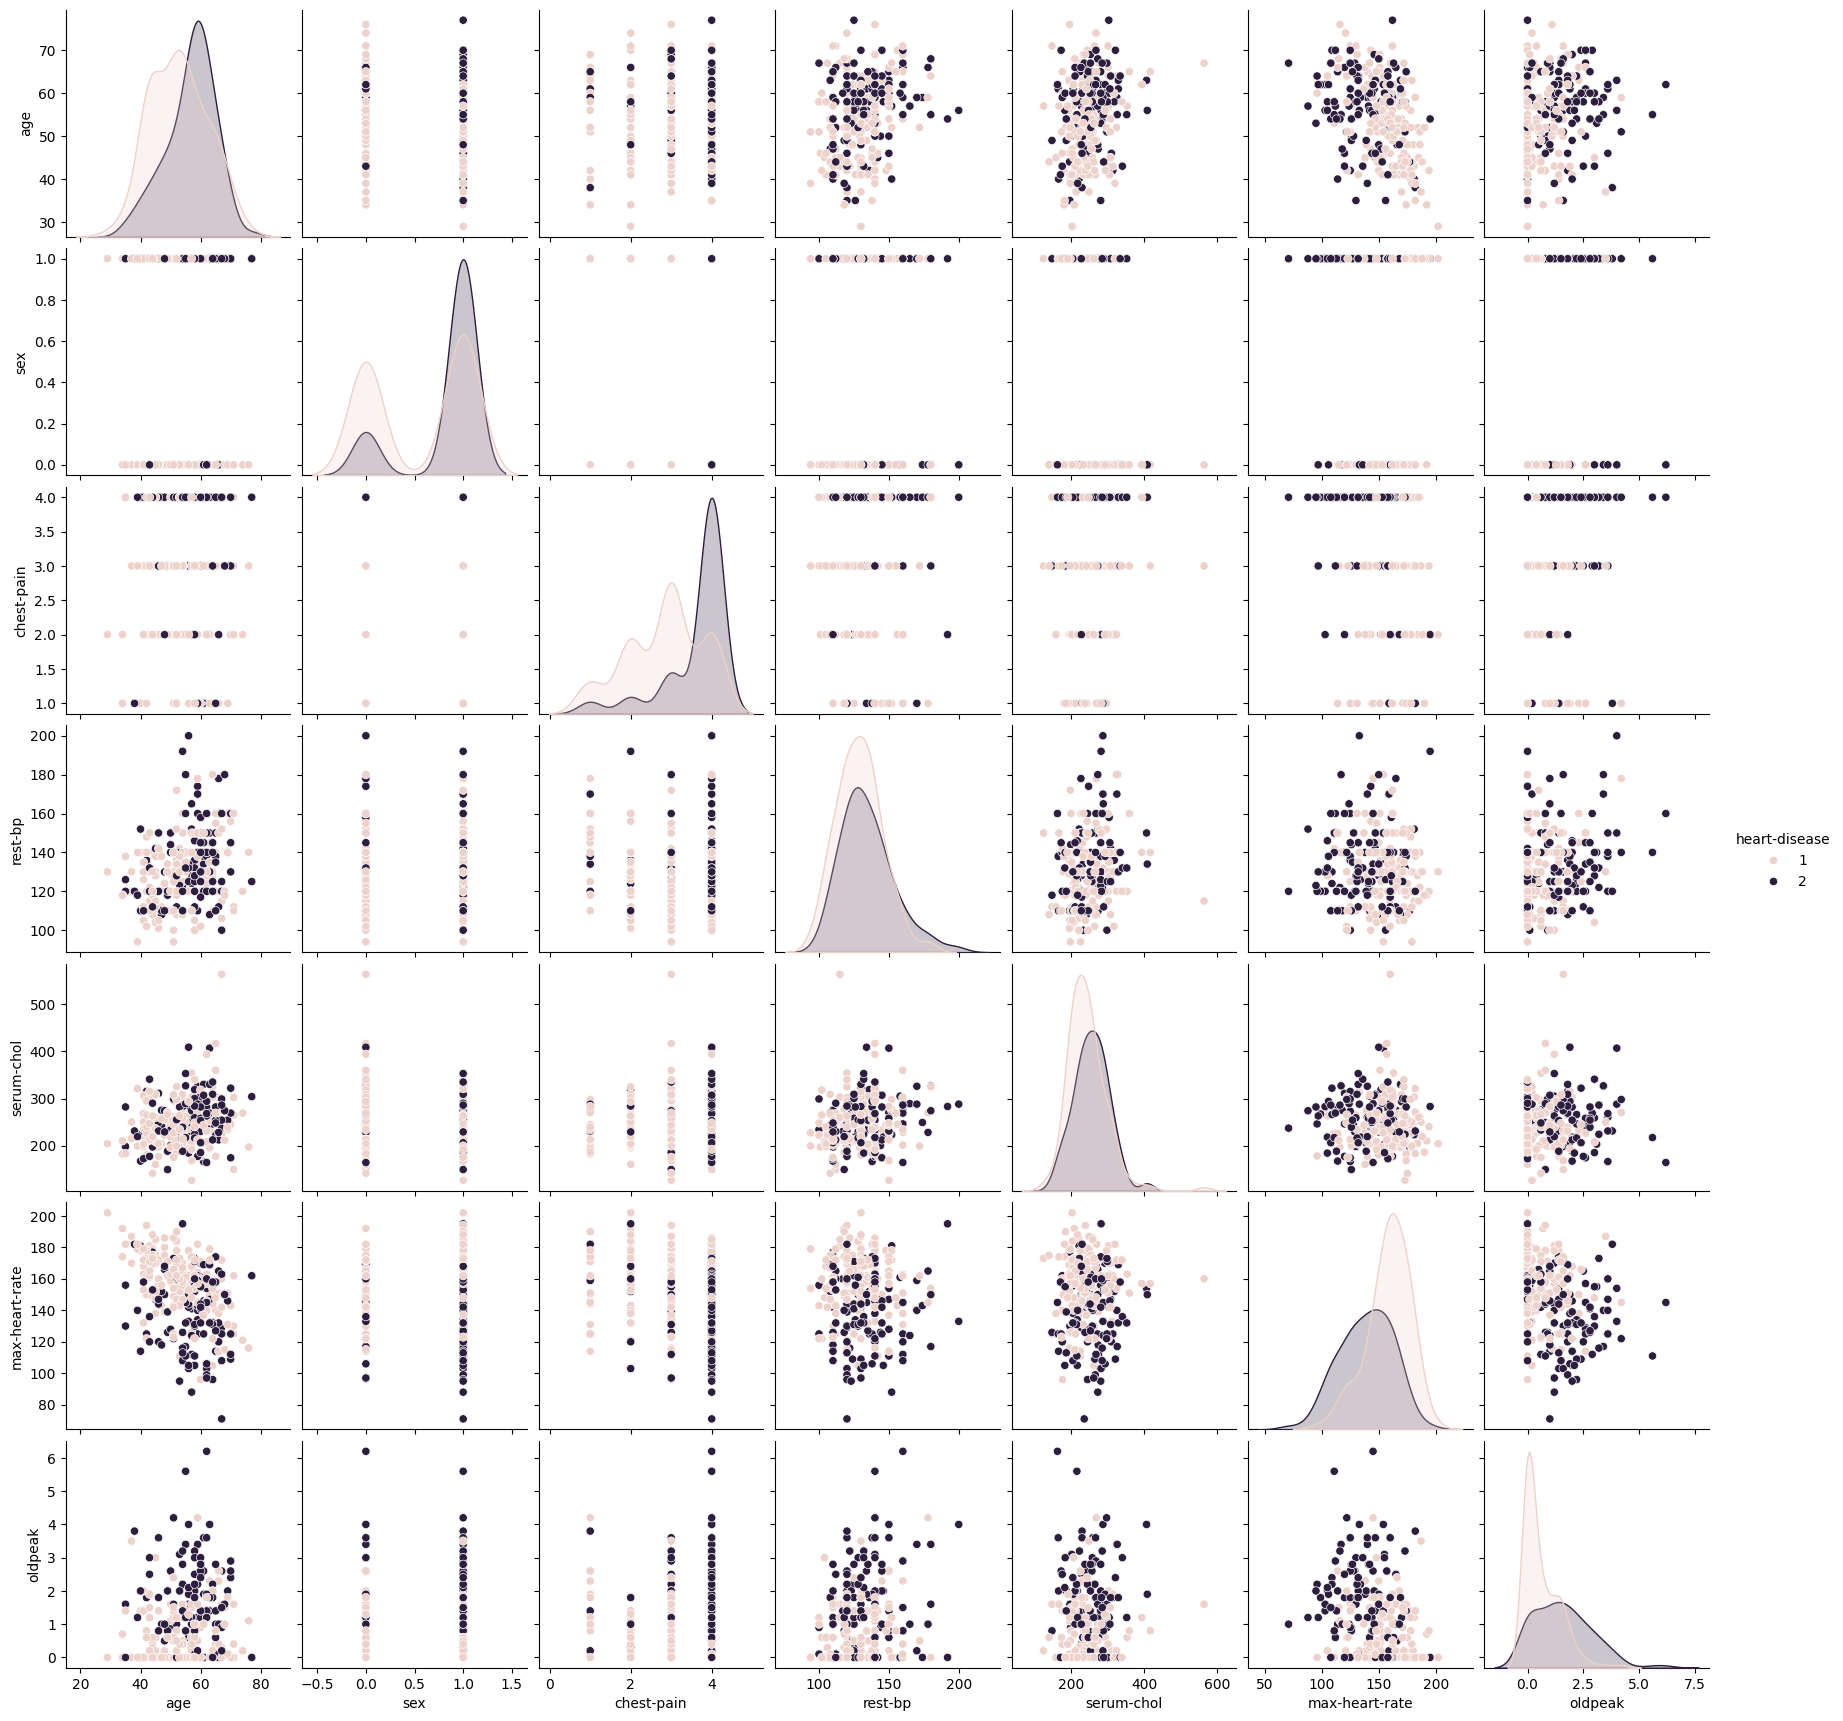

In [8]:
import seaborn
feature_subset = ['age','sex', 'chest-pain', 'rest-bp', 'serum-chol', 'max-heart-rate', 'oldpeak']
seaborn.pairplot(pandas.concat([X[feature_subset], y], axis=1), hue='heart-disease')

In [9]:
y.describe()

,heart-disease
count,270.000000
mean,1.444444
std,0.497827
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [10]:
from sklearn.model_selection import train_test_split

# TODO : add seed here
import numpy
numpy.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
X_train.describe()

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,54.751323,0.693122,3.211640,131.809524,251.529101,0.137566,1.042328,149.317460,0.370370,1.155556,1.608466,0.698413,4.783069
std,9.132393,0.462423,0.966278,17.952233,52.554890,0.345359,0.999099,22.877443,0.484186,1.195707,0.614655,0.967035,1.948957
min,29.000000,0.000000,1.000000,94.000000,141.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,215.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,4.000000,130.000000,244.000000,0.000000,2.000000,154.000000,0.000000,1.000000,2.000000,0.000000,3.000000
75%,62.000000,1.000000,4.000000,140.000000,282.000000,0.000000,2.000000,166.000000,1.000000,1.800000,2.000000,1.000000,7.000000
max,74.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [12]:
X_test.describe()

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,53.691358,0.641975,3.086420,130.259259,245.296296,0.172840,0.975309,150.518519,0.234568,0.803704,1.530864,0.604938,4.493827
std,9.067307,0.482407,0.911009,17.711421,49.644094,0.380464,0.999691,23.948440,0.426369,0.981000,0.614134,0.889930,1.917834
min,35.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,46.000000,0.000000,3.000000,120.000000,208.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,3.000000,130.000000,249.000000,0.000000,0.000000,153.000000,0.000000,0.500000,1.000000,0.000000,3.000000
75%,59.000000,1.000000,4.000000,140.000000,273.000000,0.000000,2.000000,167.000000,0.000000,1.400000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,192.000000,407.000000,1.000000,2.000000,195.000000,1.000000,4.000000,3.000000,3.000000,7.000000


# Fitting a model

We will train a random forest classifier.

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train.values.reshape(-1))

RandomForestClassifier()

In [14]:
print(f'Training accuracy {numpy.mean(clf.predict(X_train) == y_train.values.reshape(-1))}')
print(f'Test accuracy {numpy.mean(clf.predict(X_test) == y_test.values.reshape(-1))}')

Training accuracy 1.0
Test accuracy 0.8271604938271605


# Assessing the feature importance

# Question 1

Find the feature importances of the random forest.

<Axes: >

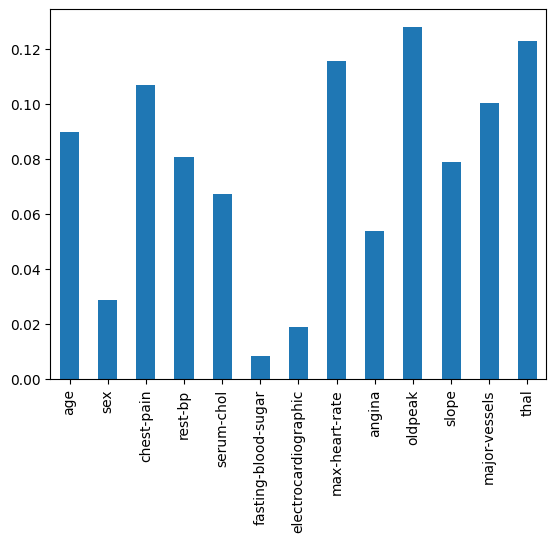

In [15]:
forest_importances = pandas.Series(clf.feature_importances_, index=X.columns)
forest_importances.plot.bar()

<Axes: >

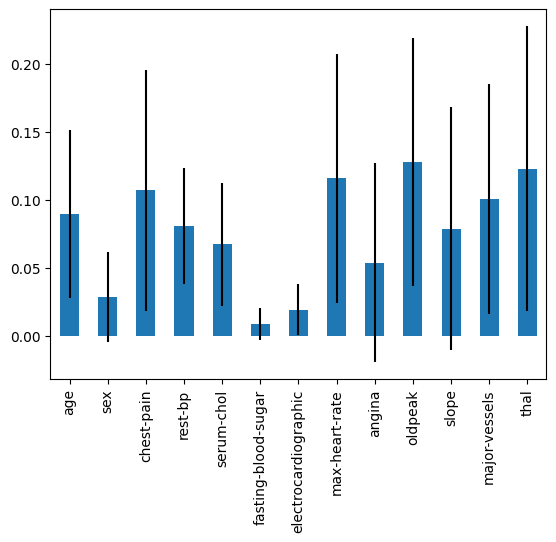

In [16]:
std = numpy.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std)

<Axes: >

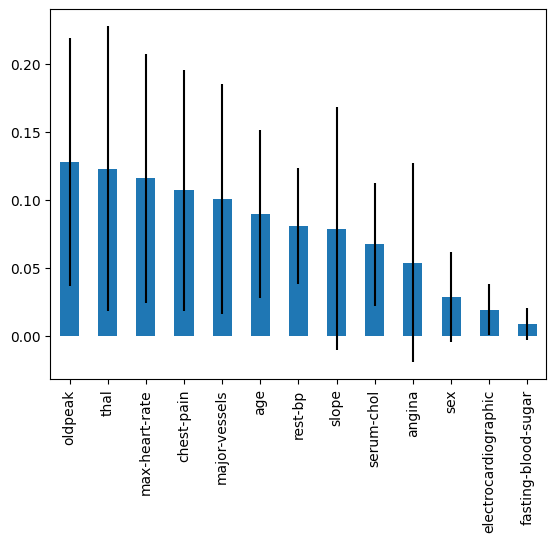

In [17]:
new_order = numpy.argsort(-clf.feature_importances_)
sorted_forest_importances = pandas.Series(clf.feature_importances_[new_order], index=X.columns[new_order])

std = numpy.std([tree.feature_importances_[new_order] for tree in clf.estimators_], axis=0)
sorted_forest_importances.plot.bar(yerr=std)

# Using SHAP to explain the feature importance

In [18]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

In [19]:
import shap

shap.initjs()


explainer = shap.KernelExplainer(clf.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0, :])
shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

Using 189 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/81 [00:00<?, ?it/s]

/tmp/ipykernel_23715/244803252.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values=shap_values[...,0], features=X_test)


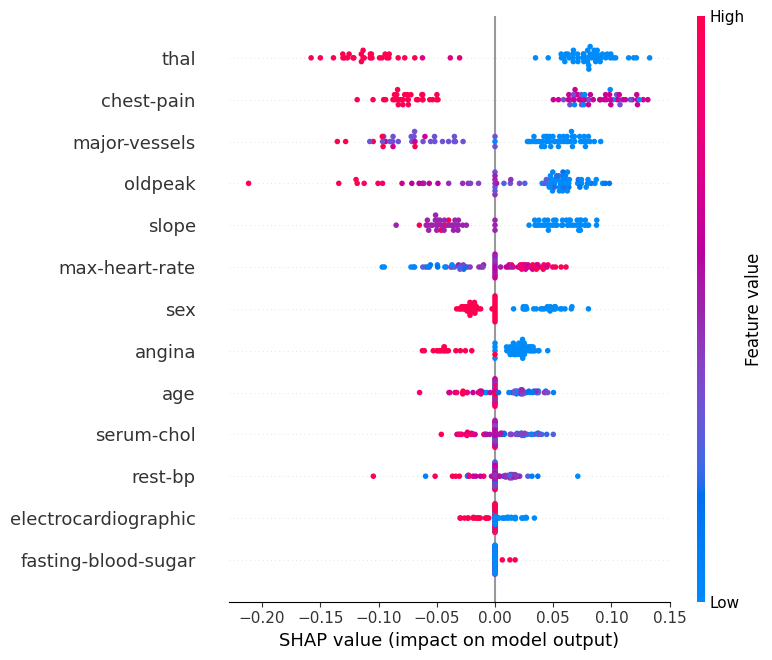

In [20]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values=shap_values[...,0], features=X_test)

In [21]:
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

  0%|          | 0/81 [00:00<?, ?it/s]

# Question 2

What features tend to contribute more when the model assigns instances to each class? Try explaining some instances assigned to each class. Then see if certain features show up more for each class.

# Question 3

Do features considered important by the Random Forest model appear as important in the SHAP explanations?

# Question 4

For instances of the same class, how different are the explanations when the model correctly or incorrectly predicts their class?

# Question 5

Now try the different models you have seen in previous classes. Do the explanations show that other features are important for different models?